In [ ]:
#Initialing Libraries and packages

import os
import numpy as np
import pandas as pd
import cv2
import glob
from skimage import io
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Mounting drive for loading dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Feature extraction function to get mean of red, green, blue channels

def feature_extraction(img):
    
    return list(cv2.mean(img)[:-1])

In [ ]:
#Converting images into machine learning compatible data 
X = []
Y = []
data=[]

for q in range(4):
    q_path = os.path.join('/content/drive/MyDrive/Apple', f'Q{q+1}')
    for img_file in os.listdir(q_path):
        img_path = os.path.join(q_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (100, 100))
        features=feature_extraction(img)
        features.append(f'Q{q+1}')
        data.append(features)
        X.append(img)
        Y.append(q)


In [ ]:
# Converting data into numpy arrays

X = np.array(X)
Y = np.array(Y)
print(data)

[[131.6578, 139.8026, 136.0466, 'Q1'], [134.18890000000002, 143.43380000000002, 138.24450000000002, 'Q1'], [128.5019, 137.9773, 134.0624, 'Q1'], [130.98600000000002, 140.1618, 136.0166, 'Q1'], [133.62560000000002, 142.5172, 137.1677, 'Q1'], [132.82760000000002, 142.05280000000002, 136.7241, 'Q1'], [135.719, 144.6648, 139.4833, 'Q1'], [126.38510000000001, 135.28640000000001, 131.0488, 'Q1'], [128.8693, 137.6353, 133.55360000000002, 'Q1'], [137.0274, 146.185, 140.8124, 'Q1'], [128.74540000000002, 137.5191, 133.4617, 'Q1'], [125.62920000000001, 134.92010000000002, 130.9085, 'Q1'], [128.0438, 136.8838, 133.046, 'Q1'], [136.7645, 145.9597, 140.6736, 'Q1'], [128.2887, 136.9767, 132.1483, 'Q1'], [128.949, 137.7632, 133.7807, 'Q1'], [137.19910000000002, 146.3598, 140.8864, 'Q1'], [126.54530000000001, 134.9933, 131.6327, 'Q1'], [135.04940000000002, 143.42860000000002, 139.6215, 'Q1'], [136.7717, 145.45950000000002, 141.3069, 'Q1'], [129.22230000000002, 138.2782, 134.1722, 'Q1'], [135.2999, 144.

In [ ]:
#Visualizing curated data as a dataframe

df = pd.DataFrame(data, columns=['Red','Green','Blue','class'])
print(df)

aX = df[df['class']=='Q1']
bX = df[df['class']=='Q2']
cX = df[df['class']=='Q3']
dX = df[df['class']=='Q4']

          Red     Green      Blue class
0    131.6578  139.8026  136.0466    Q1
1    134.1889  143.4338  138.2445    Q1
2    128.5019  137.9773  134.0624    Q1
3    130.9860  140.1618  136.0166    Q1
4    133.6256  142.5172  137.1677    Q1
..        ...       ...       ...   ...
924  103.7174  113.7363  108.0502    Q4
925  108.6464  120.1178  114.3185    Q4
926   86.1816   96.7960   92.6896    Q4
927   98.4973  108.7703  103.0540    Q4
928  107.9761  118.9454  112.0933    Q4

[929 rows x 4 columns]


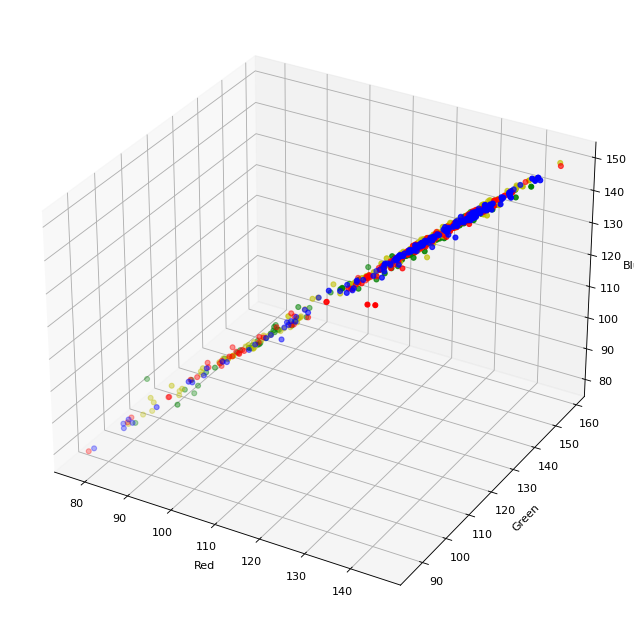

In [ ]:
#3D Plot of the Datapoints to find patterns and Outliers

%matplotlib inline

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
axis = plt.axes(projection='3d')

axis.set_xlabel('Red')
axis.set_ylabel('Green')
axis.set_zlabel('Blue');

axis.scatter3D(aX['Red'], aX['Green'], aX['Blue'],color='r')
axis.scatter3D(bX['Red'], bX['Green'], bX['Blue'],color='g')
axis.scatter3D(cX['Red'], cX['Green'], cX['Blue'],color='b')
axis.scatter3D(dX['Red'], dX['Green'], dX['Blue'],color='y')

In [ ]:
#Splitting dataset into train and test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Defining the CNN model
model = keras.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    
    
    layers.Dense(units=128, activation='relu'),
    
    layers.Dense(units=4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 33856)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=20, 
                    validation_data=(X_test, Y_test))

Epoch 1/20
24/24 [==============================] - 14s 520ms/step - loss: 145.3851 - accuracy: 0.6595 - val_loss: 0.1028 - val_accuracy: 0.9731
Epoch 2/20
24/24 [==============================] - 13s 518ms/step - loss: 0.1238 - accuracy: 0.9596 - val_loss: 0.5063 - val_accuracy: 0.7419
Epoch 3/20
24/24 [==============================] - 14s 555ms/step - loss: 0.1307 - accuracy: 0.9677 - val_loss: 0.0705 - val_accuracy: 0.9731
Epoch 4/20
24/24 [==============================] - 13s 553ms/step - loss: 0.0395 - accuracy: 0.9852 - val_loss: 0.1569 - val_accuracy: 0.9624
Epoch 5/20
24/24 [==============================] - 14s 579ms/step - loss: 0.0222 - accuracy: 0.9919 - val_loss: 0.1332 - val_accuracy: 0.9785
Epoch 6/20
24/24 [==============================] - 13s 550ms/step - loss: 0.0164 - accuracy: 0.9933 - val_loss: 0.1244 - val_accuracy: 0.9677
Epoch 7/20
24/24 [==============================] - 14s 581ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.1321 - val_accuracy: 0.96

6/6 - 1s - loss: 0.1732 - accuracy: 0.9677 - 669ms/epoch - 112ms/step


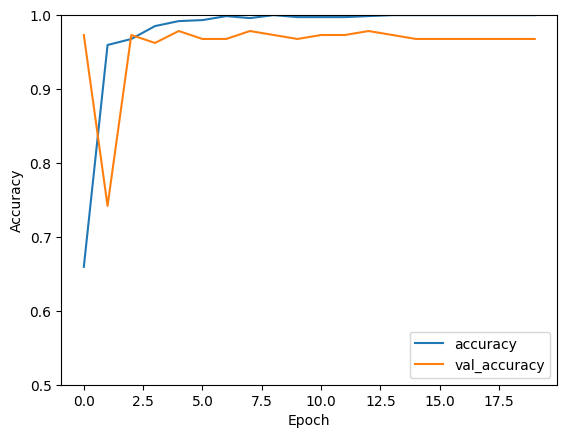

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)